<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Ecuacion%20de%20onda.%20Metodo%20explicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de Courant (lambda) = 1.00
El método es estable (r <= 1).


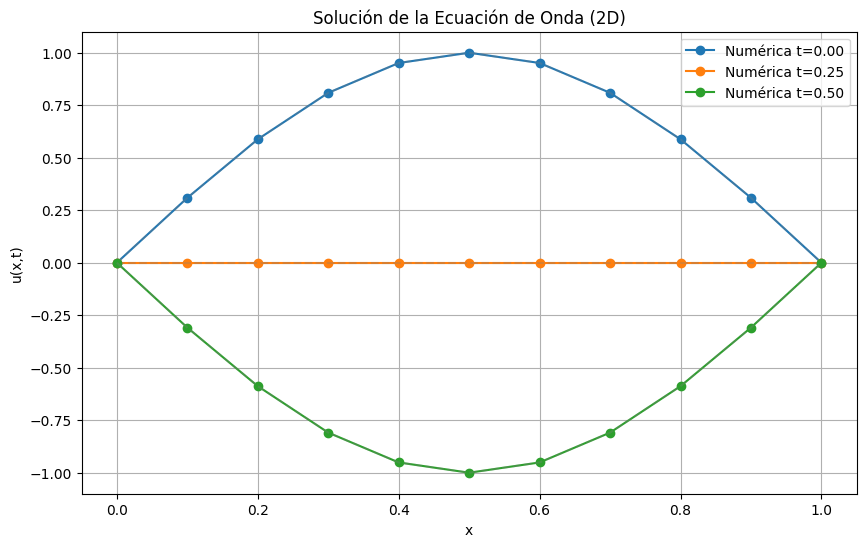

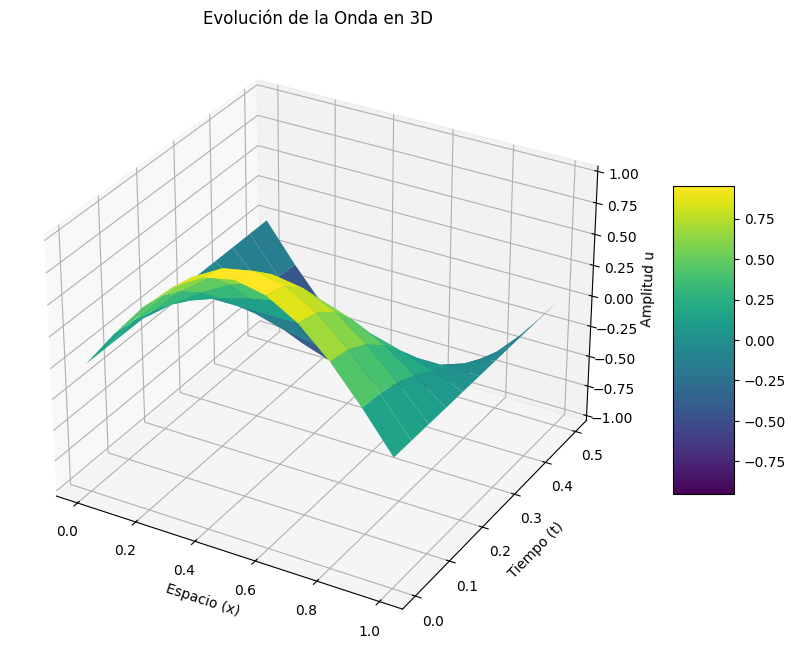


TABLA DE RESULTADOS PARA t = 0.50
x_i        | w_i (Numérica)       | u(x,t) (Exacta)      | Error Abs.          
-----------+----------------------+----------------------+---------------------
0.0        | 0.0000000000         | -0.0000000000        | 0.0000000000e+00    
0.1        | -0.3090169944        | -0.3090169944        | 5.5511151231e-17    
0.2        | -0.5877852523        | -0.5877852523        | 3.3306690739e-16    
0.3        | -0.8090169944        | -0.8090169944        | 0.0000000000e+00    
0.4        | -0.9510565163        | -0.9510565163        | 1.1102230246e-16    
0.5        | -1.0000000000        | -1.0000000000        | 0.0000000000e+00    
0.6        | -0.9510565163        | -0.9510565163        | 0.0000000000e+00    
0.7        | -0.8090169944        | -0.8090169944        | 0.0000000000e+00    
0.8        | -0.5877852523        | -0.5877852523        | 3.3306690739e-16    
0.9        | -0.3090169944        | -0.3090169944        | 5.5511151231e-17    
1.0  

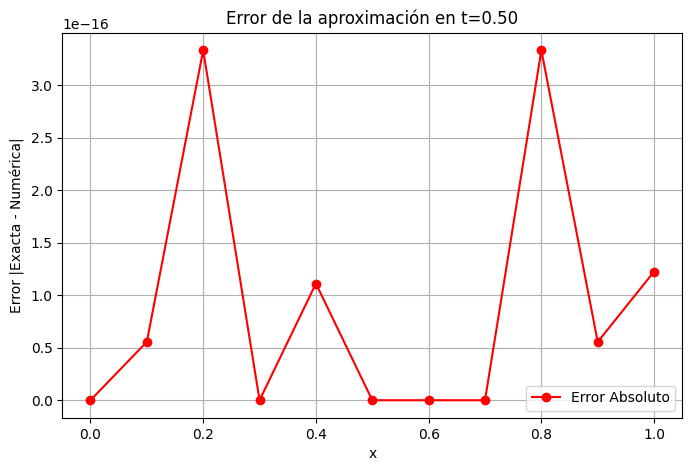

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# ==========================================
# Configuración de Parámetros y Dominio
# ==========================================

# Parámetros del problema
c = 2.0             # Velocidad de la onda (de u_tt - 4u_xx = 0, c^2 = 4 -> c = 2)
L = 1.0             # Longitud en x
T_max = 0.50        # Tiempo máximo solicitado
h = 0.1             # Paso en espacio
k = 0.05            # Paso en tiempo

# Cálculo de lambda (número de Courant)
r = (c * k) / h

print(f"Número de Courant (lambda) = {r:.2f}")
if r > 1:
    print("ADVERTENCIA: El método puede ser inestable (r > 1).")
else:
    print("El método es estable (r <= 1).")

# Definición de la malla
x = np.arange(0, L + h/2, h)     # Puntos en x: 0.0, 0.1, ... 1.0
t = np.arange(0, T_max + k/2, k) # Puntos en t: 0.0, 0.05, ... 0.50

Nx = len(x)
Nt = len(t)

# Puntos interiores (excluyendo fronteras)
N_interior = Nx - 2

# ==========================================
# Definición de Funciones y Matrices
# ==========================================

# Condición inicial u(x,0) = sin(pi*x)
def f(x):
    return np.sin(np.pi * x)

# Solución exacta u(x,t) = sin(pi*x)cos(2pi*t)
def exacta(x, t):
    return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Creación de la matriz A para el método explícito matricial
# Diagonal principal: 2(1 - r^2)
# Diagonales superior/inferior: r^2
diag_val = 2 * (1 - r**2)
off_diag_val = r**2

A = np.zeros((N_interior, N_interior))
for i in range(N_interior):
    A[i, i] = diag_val
    if i > 0:
        A[i, i-1] = off_diag_val
    if i < N_interior - 1:
        A[i, i+1] = off_diag_val

# ==========================================
# Implementación del Método Numérico
# ==========================================

# Matriz para guardar toda la solución (Filas=tiempo, Columnas=espacio)
w = np.zeros((Nt, Nx))

# 1. Aplicar condiciones iniciales (t=0)
w[0, :] = f(x)

# 2. Calcular el primer paso de tiempo (t=1)
# Usando la fórmula de arranque derivada de u_t(x,0) = 0
# u_1 = (1/2) * A * u_0 + u_0 (simplificado para diferencias finitas)
# En forma matricial pura para el interior: u^{1} = 0.5 * A * u^{0} + u^{0} NO, ES:
# u^{1} = (1/2) * A * u^{0} + u^{0} (NO)
# La fórmula correcta con u_t=0 es: u_i,1 = (1-r^2)u_i,0 + 0.5*r^2(u_{i+1} + u_{i-1})
# Que matricialmente es: U_1 = 0.5 * A * U_0 + U_0 ? NO.
# La matriz A representa (2 - 2r^2) en diagonal y r^2 fuera.
# 0.5 * A tiene (1 - r^2) en diagonal y 0.5*r^2 fuera.
# EXACTO: U_interior_1 = 0.5 * A * U_interior_0
# Pero hay que tener cuidado con los índices.
u_interior_0 = w[0, 1:-1]
u_interior_1 = 0.5 * np.dot(A, u_interior_0)
w[1, 1:-1] = u_interior_1

# 3. Ciclo iterativo para el resto de los tiempos
for j in range(1, Nt - 1):
    u_curr = w[j, 1:-1]   # tiempo j
    u_prev = w[j-1, 1:-1] # tiempo j-1

    # Esquema: u_{j+1} = A * u_j - u_{j-1}
    u_next = np.dot(A, u_curr) - u_prev
    w[j+1, 1:-1] = u_next

# ==========================================
# EJERCICIO 1: Gráficas 2D y 3D
# ==========================================

# --- Gráfica 2D ---
plt.figure(figsize=(10, 6))
# Graficamos inicio, mitad y final
tiempos_indices = [0, int(Nt/2), Nt-1]

for idx in tiempos_indices:
    tiempo_val = t[idx]
    plt.plot(x, w[idx, :], 'o-', label=f'Numérica t={tiempo_val:.2f}')
    # Comparación visual con exacta (opcional, línea punteada gris)
    plt.plot(x, exacta(x, tiempo_val), '--', color='gray', alpha=0.3)

plt.title('Solución de la Ecuación de Onda (2D)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfica 3D ---
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, T, w, cmap=cm.viridis, edgecolor='none')

ax.set_title('Evolución de la Onda en 3D')
ax.set_xlabel('Espacio (x)')
ax.set_ylabel('Tiempo (t)')
ax.set_zlabel('Amplitud u')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# ==========================================
# EJERCICIO 2: Tabla y Error (Sin Pandas)
# ==========================================

# Datos para el tiempo final t = 0.50
indice_final = Nt - 1
tiempo_final = t[indice_final]

sol_numerica = w[indice_final, :]
sol_exacta = exacta(x, tiempo_final)
error_abs = np.abs(sol_numerica - sol_exacta)


# Impresión de la tabla usando formato de cadenas (f-strings)
print(f"\n{'='*75}")
print(f"TABLA DE RESULTADOS PARA t = {tiempo_final:.2f}")
print(f"{'='*75}")
# Cabeceras con ancho fijo
print(f"{'x_i':<10} | {'w_i (Numérica)':<20} | {'u(x,t) (Exacta)':<20} | {'Error Abs.':<20}")
print(f"{'-'*10}-+-{'-'*20}-+-{'-'*20}-+-{'-'*20}")

for i in range(Nx):
    print(f"{x[i]:<10.1f} | {sol_numerica[i]:<20.10f} | {sol_exacta[i]:<20.10f} | {error_abs[i]:<20.10e}")

print(f"{'='*75}")

# Cálculo del error RMS
rms_error = np.sqrt(np.mean(error_abs**2))
print(f"\nError cuadrático medio (RMS) global: {rms_error:.5e}")

# Gráfica del Error
plt.figure(figsize=(8, 5))
plt.plot(x, error_abs, 'r-o', label='Error Absoluto')
plt.title(f'Error de la aproximación en t={tiempo_final:.2f}')
plt.xlabel('x')
plt.ylabel('Error |Exacta - Numérica|')
plt.grid(True)
plt.legend()
plt.show()


TABLA DE RESULTADOS para t = 0.50
x_i        | Numérica        | Exacta          | Error          
-----------------------------------------------------------------
0.0        | 0.0000          | -0.0000         | 0.00e+00       
0.1        | -0.3090         | -0.3090         | 5.55e-17       
0.2        | -0.5878         | -0.5878         | 1.11e-16       
0.3        | -0.8090         | -0.8090         | 0.00e+00       
0.4        | -0.9511         | -0.9511         | 1.11e-16       
0.5        | -1.0000         | -1.0000         | 0.00e+00       
0.6        | -0.9511         | -0.9511         | 0.00e+00       
0.7        | -0.8090         | -0.8090         | 0.00e+00       
0.8        | -0.5878         | -0.5878         | 1.11e-16       
0.9        | -0.3090         | -0.3090         | 5.55e-17       
1.0        | 0.0000          | -0.0000         | 1.22e-16       
-----------------------------------------------------------------


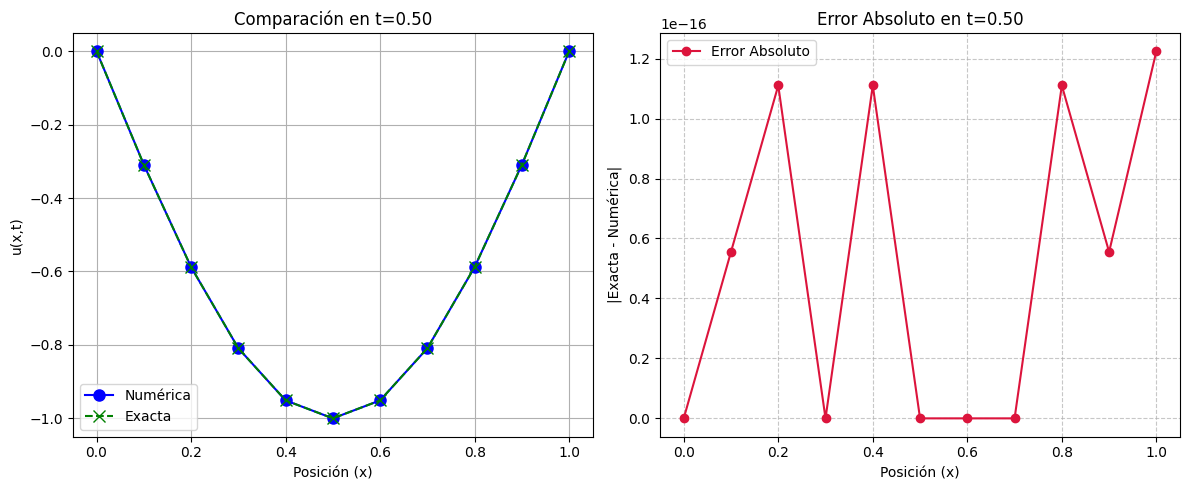

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# Configuración y Método Numérico
# ==========================================

# Parámetros
c = 2.0
L = 1.0
T_max = 0.50
h = 0.1
k = 0.05

# Malla
x = np.arange(0, L + h/2, h)
t = np.arange(0, T_max + k/2, k)
Nx = len(x)
Nt = len(t)
r = c * k / h # r = 1.0

# Inicialización
w = np.zeros((Nt, Nx))

# Funciones
def f_init(x): return np.sin(np.pi * x)
def exacta(x, t): return np.sin(np.pi * x) * np.cos(2 * np.pi * t)

# Condiciones Iniciales
w[0, :] = f_init(x)

# Primer paso (u_t = 0)
for i in range(1, Nx - 1):
    w[1, i] = 0.5 * (w[0, i+1] + w[0, i-1])

# Pasos siguientes
for j in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        w[j+1, i] = (w[j, i+1] + w[j, i-1]) - w[j-1, i]

# ==========================================
# EJERCICIO 2: Tabla y Gráficas (Numérica vs Exacta)
# ==========================================

# Datos en t = 0.50
indice_final = Nt - 1
t_final = t[indice_final]

u_num = w[indice_final, :]
u_exac = exacta(x, t_final)
error = np.abs(u_num - u_exac)

# 1. Tabla de Valores
print(f"\n{'='*65}")
print(f"TABLA DE RESULTADOS para t = {t_final:.2f}")
print(f"{'='*65}")
print(f"{'x_i':<10} | {'Numérica':<15} | {'Exacta':<15} | {'Error':<15}")
print("-" * 65)

for i in range(Nx):
    print(f"{x[i]:<10.1f} | {u_num[i]:<15.4f} | {u_exac[i]:<15.4f} | {error[i]:<15.2e}")
print("-" * 65)

# 2. Gráficas
plt.figure(figsize=(12, 5))

# Subplot 1: Comparación Directa
plt.subplot(1, 2, 1)
plt.plot(x, u_num, 'o-', label='Numérica', color='blue', markersize=8)
plt.plot(x, u_exac, 'x--', label='Exacta', color='green', markersize=8)
plt.title(f'Comparación en t={t_final:.2f}')
plt.xlabel('Posición (x)')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)

# Subplot 2: Error
plt.subplot(1, 2, 2)
plt.plot(x, error, 'o-', color='crimson', label='Error Absoluto')
plt.title(f'Error Absoluto en t={t_final:.2f}')
plt.xlabel('Posición (x)')
plt.ylabel('|Exacta - Numérica|')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

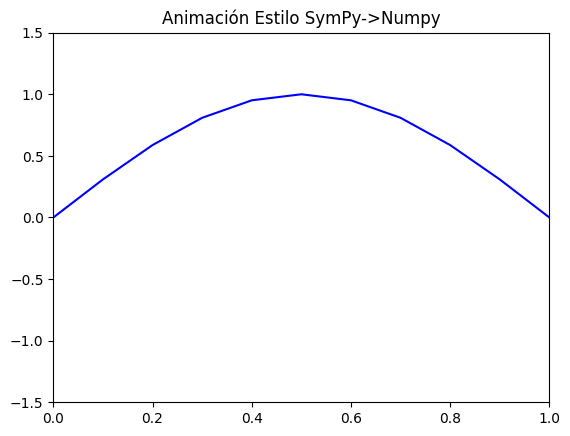

In [25]:
# --- EJERCICIO 4: ANIMACIÓN ---
fig_anim, ax_anim = plt.subplots()
ax_anim.set_xlim(0, 1)
ax_anim.set_ylim(-1.5, 1.5)
ax_anim.set_title("Animación Estilo SymPy->Numpy")
linea, = ax_anim.plot([], [], 'b-')

def init():
    linea.set_data([], [])
    return (linea,)

def animate(i):
    linea.set_data(x, U_np[i, :])
    return (linea,)

anim = FuncAnimation(fig_anim, animate, init_func=init, frames=len(t), interval=100, blit=True)
HTML(anim.to_jshtml())